> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [44]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [45]:
def corr2d(X: np.array, K: np.array) -> np.array:
  X_h = X.shape[0]
  X_w = X.shape[1]
  K_w = K.shape[0]
  K_h = K.shape[1]
  output = np.zeros((X_h - K_h +1, X_w - K_w +1))
  for i in range(X_h - K_h +1):
        for j in range(X_w - K_w +1):
            output[i, j] = np.sum(X[i:i+K_h, j:j+K_w] * K)
  return output

    # no padding for now and assume stride = 1


In [46]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (X_h - K_h +1, output_w).

- hint : Use the above corr2d function and read about np.stack

In [51]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    channels = X.shape[0]
    output = None

    for i in range(channels):
        X_chan = X[i]
        K_chan = K[i]
        result = corr2d(X_chan, K_chan)

        if output is None:
            output = result
        else:
            output += result

    return output

    # write a function for this task

In [52]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [53]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    num_filters = K.shape[0]
    output_list = []

    for i in range(num_filters):
        K_filter = K[i]
        output = corr2d_multiple_input_channels(X, K_filter)
        output_list.append(output)

    return np.stack(output_list)


In [54]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Statistical advantages: We may build invariance to local changes and noise by reducing the spatial resolution, and our output is now aggregated across a greater area.

Computerised advantages: It decreases the spatial dimensions by bypassing intermediate values, which results in fewer computations and smaller feature maps, which shorten processing time by requiring fewer operations.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [55]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [56]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [58]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

#couldn't solve the error :(

ValueError: ignored

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [59]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    X_h, X_w = X.shape
    K_h, K_w = K

    output_h = X_h // K_h
    output_w = X_w // K_w

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            output[i, j] = np.max(X[i * K_h : (i+1) * K_h, j * K_w : (j+1) * K_w])

    return output


In [60]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 11s 0us/step


In [13]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


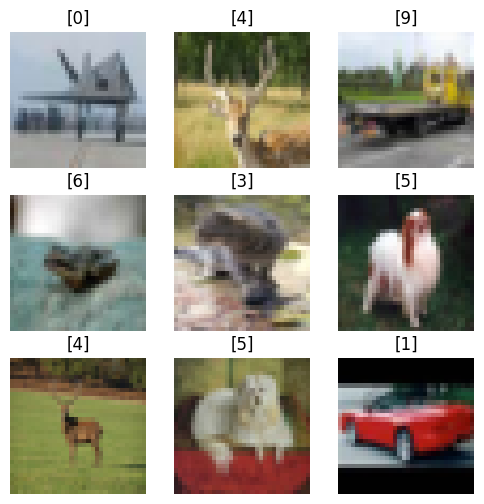

In [14]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [15]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

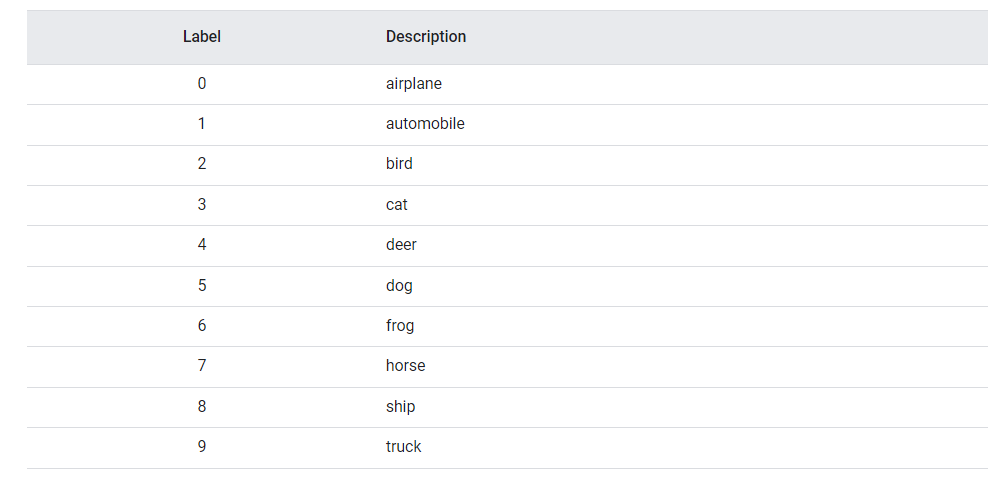

In [16]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [17]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [42]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:A well-liked optimisation technique for deep learning neural network training is the Adam optimizer. 
It is an extension of the stochastic gradient descent (SGD) optimizer that combines the ideas of adaptive learning rates and momentum to achieve efficient and effective optimisation.


The following are the enticing advantages of using Adam to solve non-convex optimisation problems:
1.Simple to implement (we'll show you how to implement Adam later in this post; you'll see firsthand how using potent deep learning frameworks makes implementation much simpler with less lines of code.)
2.Computerised effectiveness
3.little memory is needed
4.Adam is invariant to multiplying the gradient by a diagonal matrix with only positive elements; for a fuller understanding, see this stack exchange. Invariant to diagonal rescaling of the gradients
5.ideally suited for situations with a high number of parameters or data
6.suitable for issues with extremely noisy and/or sparse gradients

Steps involved are:
1.Carry over momentum and sum of gradient square from the previous iteration.
2.Take momentum and square decay.
3.Then, take gradient at the position of the ball as shown in the figure above.
4.Next, add the gradient onto the momentum and its square onto square (scaled by 1-decay)
5.Then divide the momentum by the side of the square.
6.Finally, take a step and a new iteration begins as shown in the figure.

Reference Links: https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a
https://insideaiml.com/blog/Adam-Optimizer:-In-depth-explanation-1051

"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:A well-liked optimisation technique for deep learning neural network training is the Adam optimizer. \nIt is an extension of the stochastic gradient descent (SGD) optimizer that combines the ideas of adaptive learning rates and momentum to achieve efficient and effective optimisation.\n\n\nThe following are the enticing advantages of using Adam to solve non-convex optimisation problems:\n1.Simple to implement (we'll show you how to implement Adam later in this post; you'll see firsthand how using potent deep learning frameworks makes implementation much simpler with less lines of code.)\n2.Computerised effectiveness\n3.little memory is needed\n4.Adam is invariant to multiplying the gradient by a diagonal matrix with only positive elements; for a fuller understanding, see this stack exchange. Invariant to diagonal rescaling of the gradients\n5.ideally suited for situations with a high numb

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [20]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 47s 51ms/step - loss: 2.5608 - accuracy: 0.0968 - val_loss: 2.3018 - val_accuracy: 0.0993
Epoch 2/10
875/875 [==============================] - 49s 56ms/step - loss: 2.3023 - accuracy: 0.0993 - val_loss: 2.3022 - val_accuracy: 0.0984
Epoch 3/10
875/875 [==============================] - 42s 48ms/step - loss: 2.3016 - accuracy: 0.0981 - val_loss: 2.3121 - val_accuracy: 0.0977
Epoch 4/10
875/875 [==============================] - 44s 50ms/step - loss: 2.3010 - accuracy: 0.1003 - val_loss: 2.3007 - val_accuracy: 0.0996
Epoch 5/10
875/875 [==============================] - 48s 55ms/step - loss: 2.3010 - accuracy: 0.1024 - val_loss: 2.3043 - val_accuracy: 0.0976
Epoch 6/10
875/875 [==============================] - 43s 50ms/step - loss: 2.3009 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.0970
Epoch 7/10
875/875 [==============================] - 44s 51ms/step - loss: 2.2999 - accuracy: 0.1024 - val_loss: 2.3032 - val_accuracy: 0.0984
Epo

In [21]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is the accuracy we calculate on the dataset we don't use for training our model. This also can be reffered as test accuracy.
We have split the data in training and validation data by a ratio of 0.2 which means 80% of our data is used for training while rmaining 20% is used for testing.
"""

" \nWrite about validation accuracy in 100 words.\n\nAnswer: Validation accuracy is the accuracy we calculate on the dataset we don't use for training our model. This also can be reffered as test accuracy.\nWe have split the data in training and validation data by a ratio of 0.2 which means 80% of our data is used for training while rmaining 20% is used for testing.\n"

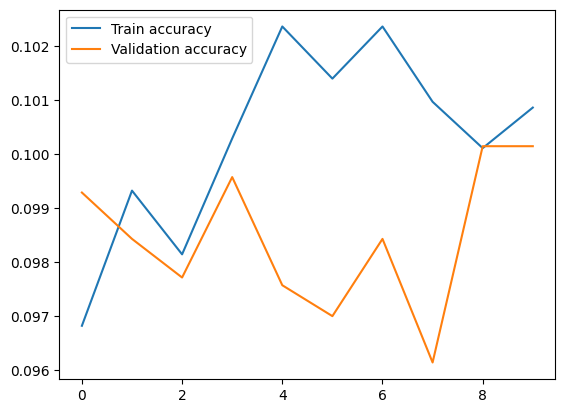

In [22]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [23]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively

ANSWER:Both the train loss and the validation loss drop as the number of iterations rises, indicating that the model is in the training phase.
However, as was already said, their accuracies are rather low, suggesting that funnelling down (thus lowering the amount of features) as in the case of thick layers is ineffective in producing a model that can perform well on unobserved data (validation set).
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n\nANSWER:Both the train loss and the validation loss drop as the number of iterations rises, indicating that the model is in the training phase.\nHowever, as was already said, their accuracies are rather low, suggesting that funnelling down (thus lowering the amount of features) as in the case of thick layers is ineffective in producing a model that can perform well on unobserved data (validation set).\n'

In [24]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [25]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [26]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 35s 39ms/step - loss: 2.2417 - accuracy: 0.2679 - val_loss: 1.7577 - val_accuracy: 0.3411
Epoch 2/20
875/875 [==============================] - 39s 45ms/step - loss: 1.6740 - accuracy: 0.3878 - val_loss: 1.6465 - val_accuracy: 0.3980
Epoch 3/20
875/875 [==============================] - 32s 37ms/step - loss: 1.5529 - accuracy: 0.4376 - val_loss: 1.5668 - val_accuracy: 0.4393
Epoch 4/20
875/875 [==============================] - 35s 40ms/step - loss: 1.4559 - accuracy: 0.4745 - val_loss: 1.5383 - val_accuracy: 0.4579
Epoch 5/20
875/875 [==============================] - 32s 37ms/step - loss: 1.3632 - accuracy: 0.5136 - val_loss: 1.4406 - val_accuracy: 0.4861
Epoch 6/20
875/875 [==============================] - 38s 43ms/step - loss: 1.3035 - accuracy: 0.5337 - val_loss: 1.4056 - val_accuracy: 0.5090
Epoch 7/20
875/875 [==============================] - 36s 41ms/step - loss: 1.2410 - accuracy: 0.5606 - val_loss: 1.4047 - val_accuracy:

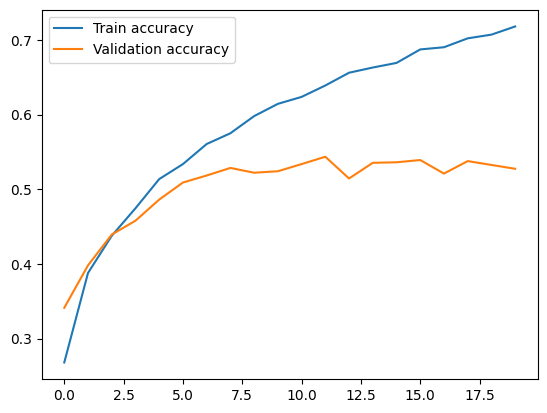

In [27]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [28]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

ANSWER: The model has improved, as seen by the rise in training accuracy.
Since validation accuracy and training accuracy appear to differ, the work is not yet complete.
Because of overfitting in our model, which occurs when a model is able to perform well on a training set of seen data but poorly on a set of unseen data (the validation set), validation loss decreases initially, then increases as the number of validation epochs increases.
"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n\nANSWER: The model has improved, as seen by the rise in training accuracy.\nSince validation accuracy and training accuracy appear to differ, the work is not yet complete.\nBecause of overfitting in our model, which occurs when a model is able to perform well on a training set of seen data but poorly on a set of unseen data (the validation set), validation loss decreases initially, then increases as the number of validation epochs increases.\n"

In [29]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [30]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [31]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Overfitting is a condition when a model memorises the training data rather than understanding the patterns because it has gotten too complicated or has been trained for too long. Because of this, the model excels on the training data but fails to generalise to fresh, untried data. Using a model that is excessively flexible or strong in comparison to the quantity and quality of available data might lead to overfitting.
underfitting occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the data.The model performs badly on both the training set and untrained data because it is unable to understand the complexity of the training data. Using a model that is too restricted or not allowing for enough training iterations might result in underfitting.

Reference links: https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
https://towardsdatascience.com/overfitting-and-underfitting-principles-ea8964d9c45c#:~:text=Underfitting%20means%20that%20your%20model,val%2Ftest%20error%20is%20large.https://towardsdatascience.com/overfitting-and-underfitting-principles-ea8964d9c45c#:~:text=Underfitting%20means%20that%20your%20model,val%2Ftest%20error%20is%20large.
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: Overfitting is a condition when a model memorises the training data rather than understanding the patterns because it has gotten too complicated or has been trained for too long. Because of this, the model excels on the training data but fails to generalise to fresh, untried data. Using a model that is excessively flexible or strong in comparison to the quantity and quality of available data might lead to overfitting.\nunderfitting occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the data.The model performs badly on both the training set and untrained data because it is unable to understand the complexity of the training data. Using a model that is too restricted or not allowing for enough training iterations might result in underfitting.\nReference links: https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/\n

In [37]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: In machine learning, regularisation techniques are used to reduce overfitting and enhance the generalizability of models. 
They impose additional limitations or penalties on the model's learning process, discouraging or preventing it from overfitting the training data and encouraging the use of simpler or more robust solutions 
Regularisation approaches aid in finding the right balance between a good fit to the training set and avoiding a focus on noise or unimportant patterns.
This technique can be used in such a way that it will allow to maintain all variables or features in the model by reducing the magnitude of the variables. Hence, it maintains accuracy as well as a generalization of the model.
It mainly regularizes or reduces the coefficient of features toward zero.
In simple words, "In regularization technique, we reduce the magnitude of the features by keeping the same number of features."

Refeerence Links: https://www.javatpoint.com/regularization-in-machine-learning
"""

"\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: In machine learning, regularisation techniques are used to reduce overfitting and enhance the generalizability of models. \nThey impose additional limitations or penalties on the model's learning process, discouraging or preventing it from overfitting the training data and encouraging the use of simpler or more robust solutions (what I mean by simpler is that it does not have to take into account every point because there are numerous points with high variations, such as those from their neighbouring regions, so taking them into account reduces the model's efficiency).\nRegularisation approaches aid in finding the right balance between a good fit to the training set and avoiding a focus on noise or unimportant patterns.\n\n"

In [33]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: A regularisation method frequently employed in neural networks, especially in deep learning models, is the dropout layer. 
It is intended to reduce overfitting, which happens when a model gets too tailored to the training set and performs badly on untrained data. 
In order to avoid overfitting, the Dropout layer randomly sets input units to 0 at a frequency of rate at each step during training. 
The total of all inputs is maintained by scaling up non-zero inputs by 1/(1 - rate).
This method reduces overfitting since each neuron learns weight values that are not dependent on the cooperation of its nearby neurons. Each neuron becomes independently sufficient as a result.
A dropout layer randomly changes a portion of the input units to zero at each update during the training phase. 
The next layers during that specific forward and backward pass essentially disregard these "dropped out" units. 
The percentage of units to be dropped out is frequently specified as a hyperparameter and might fluctuate between various network levels.
As a result, it lessens the interactions between neurons and aids in avoiding over-reliance on a limited collection of properties.
As a result, the model may perform better on new data as it becomes less dependent on the specifics of the training set.

Reference links: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.

"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: A regularisation method frequently employed in neural networks, especially in deep learning models, is the dropout layer. \nIt is intended to reduce overfitting, which happens when a model gets too tailored to the training set and performs badly on untrained data. \nIn order to avoid overfitting, the Dropout layer randomly sets input units to 0 at a frequency of rate at each step during training. \nThe total of all inputs is maintained by scaling up non-zero inputs by 1/(1 - rate).\nThis method reduces overfitting since each neuron learns weight values that are not dependent on the cooperation of its nearby neurons. Each neuron becomes independently sufficient as a result.\nA dropout layer randomly changes a portion of the input units to zero at each update during the training phase. \nThe next layers during that specific forward and backward pass essentially disregard t

In [40]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: 
L1 normalisation is a method for scaling numerical data such that the total of each data point's absolute values in a vector or matrix equals 1.
It is frequently used as a preprocessing step in machine learning and data analysis jobs to make sure that all features or variables have the same scale.
It is the total of the magnitudes of the vectors in a space is the L1 Norm. 
It is denoted by ||x|| (where x is a vector) and it is the most straightforward approach to measuring the distance between vectors, as it is the total of the absolute differences of the vectors’ components. 
All vector components are weighted equally in this norm.
L1 normalisation provides a number of advantages. It can be useful when the magnitudes of the characteristics differ much since it makes sure that no feature dominates learning as a result of its bigger size. 
Additionally, as the normalised values are constrained to the range of 0 to 1, L1 normalisation might enhance the data's interpretability.


Formulation:
a vector x = [x1, x2, ..., xn], the L1 normalization is performed by dividing each element of the vector by the sum of the absolute values of all elements:

L1_normalized_x = [x1 / (|x1| + |x2| + ... + |xn|), x2 / (|x1| + |x2| + ... + |xn|), ..., xn / (|x1| + |x2| + ... + |xn|)]

Reference links: https://www.askpython.com/python/examples/compute-l1-l2-norms ,chatgpt
"""

"\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \nL1 normalisation is a method for scaling numerical data such that the total of each data point's absolute values in a vector or matrix equals 1.\nIt is frequently used as a preprocessing step in machine learning and data analysis jobs to make sure that all features or variables have the same scale.\nIt is the total of the magnitudes of the vectors in a space is the L1 Norm. \nIt is denoted by ||x|| (where x is a vector) and it is the most straightforward approach to measuring the distance between vectors, as it is the total of the absolute differences of the vectors’ components. \nAll vector components are weighted equally in this norm.\nL1 normalisation provides a number of advantages. It can be useful when the magnitudes of the characteristics differ much since it makes sure that no feature dominates learning as a result of its bigger size. \nAdditionally, as the normalised values are 

In [39]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: The process of scaling numerical data so that the Euclidean norm, often referred to as the L2 norm, of a vector equals one is known as L2 normalisation, also known as Euclidean normalisation or L2 normalisation. 
Similar to L1 normalisation, L2 normalisation is frequently applied as a preprocessing step in machine learning and data analysis applications to guarantee that all features or variables have the same scale.
L2 normalisation provides a number of benefits. While scaling the original vector's magnitude, it keeps its direction. 
Additionally, it helps to eliminate bias in favour of characteristics with greater magnitudes when dealing with features of various sizes. 
L2 normalisation can also help lessen the effect of outliers in the data.

Formulation:
a vector x = [x1, x2, ..., xn], the L2 normalization is performed by dividing each element of the vector by the Euclidean norm:

L2_normalized_x = [x1 / sqrt(x1^2 + x2^2 + ... + xn^2), x2 / sqrt(x1^2 + x2^2 + ... + xn^2), ..., xn / sqrt(x1^2 + x2^2 + ... + xn^2)]

Reference Links: https://www.askpython.com/python/examples/compute-l1-l2-norms , chatgpt
"""

"\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: The process of scaling numerical data so that the Euclidean norm, often referred to as the L2 norm, of a vector equals one is known as L2 normalisation, also known as Euclidean normalisation or L2 normalisation. \nSimilar to L1 normalisation, L2 normalisation is frequently applied as a preprocessing step in machine learning and data analysis applications to guarantee that all features or variables have the same scale.\nL2 normalisation provides a number of benefits. While scaling the original vector's magnitude, it keeps its direction. \nAdditionally, it helps to eliminate bias in favour of characteristics with greater magnitudes when dealing with features of various sizes. \nL2 normalisation can also help lessen the effect of outliers in the data.\n\nFormulation:\na vector x = [x1, x2, ..., xn], the L2 normalization is performed by dividing each element of the vector by the Euclidean norm

In [38]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentation combines the words "augmentation" with "data." It is a widely used method for improving an overfitted data model's generalizability. Data analysis includes data augmentation. 
By adding changed copies of previously existing data, a collection of procedures is utilised to expand the amount of data. From the current data, it can occasionally produce newly synthetic data. 
Data augmentation helps control overfitting of data by acting as a regularizer. By producing more training data and exposing the model to various data versions, data augmentation raises the risk of overfitting the model. 
Machine learning includes the notion of data augmentation. Machine learning has many variations, and its range of applications is expanding quickly. And data augmentation serves as a way to overcome these difficulties. 
It helps machine learning models perform better and produce better results. The methods for data augmentation make the data rich and sufficient, which improves the performance and accuracy of the model.
By injecting transformation into the datasets, data augmentation techniques save operating expenses. 
Data cleaning is aided by data augmentation, which is necessary for high accuracy models. Machine learning is strengthened by data augmentation by adding variances to the model.
 
Reference Links: https://www.analyticssteps.com/blogs/data-augmentation-techniques-benefits-and-applications
https://research.aimultiple.com/data-augmentation/
"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: Data augmentation combines the words "augmentation" with "data." It is a widely used method for improving an overfitted data model\'s generalizability. Data analysis includes data augmentation. \nBy adding changed copies of previously existing data, a collection of procedures is utilised to expand the amount of data. From the current data, it can occasionally produce newly synthetic data. \nData augmentation helps control overfitting of data by acting as a regularizer. By producing more training data and exposing the model to various data versions, data augmentation raises the risk of overfitting the model. \nMachine learning includes the notion of data augmentation. Machine learning has many variations, and its range of applications is expanding quickly. And data augmentation serves as a way to overcome these difficulties. \nIt helps machine learning models perfo